In [1]:
# Calculate AUROC and AUPR for Chymera screen scored using 6 scoring methods.

In [2]:
# Uncomment the command below if you run this script separately. 
%run AnalysisFunctions.ipynb
apply_filter = "False"


C:\Users\hamda\AppData\Local\Temp\ipykernel_3988\1198573690.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ground_truth_depmap_hit = ground_truth_depmap_hit.replace({True: 1, False: 0})


In [3]:
print("Running Chymera Analysis")


print(f"Apply Filter?: {apply_filter}")

if apply_filter.lower() == "true":
    filtered = "/Filtered"
    print("Compiling results with filtered pairs")
else:
    filtered = ""
    print("Compiling results with unfiltered pairs")

Running Chymera Analysis
Apply Filter?: False
Compiling results with unfiltered pairs


In [4]:
# Load the zdLFC scores
# zdLFC does not filter out anything so filtered = unfiltered 
zdLFC_HAP1 = pd.read_csv("../zdLFC Scripts/zdLFC Output/ChymeraHAP1.csv")
zdLFC1_RPE1 = pd.read_csv("../zdLFC Scripts/zdLFC Output/ChymeraRPE1.csv")

zdLFC_HAP1 = zdLFC_HAP1.rename(columns={zdLFC_HAP1.columns[0]: 'GENE'})
zdLFC_HAP1 = zdLFC_HAP1.set_index('GENE')

zdLFC1_RPE1 = zdLFC1_RPE1.rename(columns={zdLFC1_RPE1.columns[0]: 'GENE'})
zdLFC1_RPE1 = zdLFC1_RPE1.set_index('GENE')

zdLFC = pd.concat([zdLFC_HAP1, zdLFC1_RPE1], axis=1)
zdLFC = reindex_alphbetically(zdLFC) # Make sure they are alphabetically ordered

zdLFC = -1 * zdLFC # less score -> SL 
zdLFC

,HAP1.T12,HAP1.T18,RPE1.T18,RPE1.T24
gene_pair,,,,
SLC16A1_SLC16A3,3.079870,3.178437,-0.426222,-0.488211
MDM4_TP53,-0.613075,-0.908437,-3.283425,-3.768230
APC_CTNNB1,-1.737626,-1.463598,0.347256,1.920514
BRAF_MAP2K1,0.006388,-0.241020,0.282762,-0.216686
CCNE1_CDK2,-1.410824,-1.479251,-0.403568,-0.549091
...,...,...,...,...
ZDHHC14_ZDHHC18,0.042587,-0.405947,-2.631998,-2.657310
ZFR_ZFR2,-0.351803,-0.304981,-0.656749,-0.703379
ZFYVE16_ZFYVE9,-0.363787,-0.261383,-0.425835,0.137280


In [5]:
orthrus = pd.read_csv("../Orthrus Scripts/OrthrusOutput" + filtered + "/chymera_orthrus.tsv", sep='\t')
orthrus['GENE'] = orthrus['gene1'] + "_" + orthrus['gene2']
orthrus = orthrus.filter(like='differential', axis=1) \
                    .join(orthrus.filter(items=['GENE']))

orthrus = orthrus.rename(columns={'differential_combn_vs_single_HAP1_T12': 'HAP_T12', 'differential_combn_vs_single_HAP1_T18': 'HAP_T18', 'differential_combn_vs_single_RPE1_T18': 'RPE_T18',
                                  'differential_combn_vs_single_RPE1_T24': 'RPE_T24'})
orthrus = orthrus.set_index('GENE')

orthrus = reindex_alphbetically(orthrus)
orthrus = orthrus * -1


In [6]:
gemini_strong_HAP1 = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Chymera_HAP1_Strong.csv")
gemini_strong_HAP1 = gemini_strong_HAP1.rename(columns={gemini_strong_HAP1.columns[0]: 'gene_pair'})
gemini_strong_HAP1['gene_pair'] = gemini_strong_HAP1['gene_pair'].str.replace(';', '_')
gemini_strong_HAP1 = gemini_strong_HAP1.set_index('gene_pair')
gemini_strong_HAP1 = reindex_alphbetically(gemini_strong_HAP1)
gemini_strong_HAP1

gemini_strong_RPE1 = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Chymera_RPE1_Strong.csv")
gemini_strong_RPE1 = gemini_strong_RPE1.rename(columns={gemini_strong_RPE1.columns[0]: 'gene_pair'})
gemini_strong_RPE1['gene_pair'] = gemini_strong_RPE1['gene_pair'].str.replace(';', '_')
gemini_strong_RPE1 = gemini_strong_RPE1.set_index('gene_pair')
gemini_strong_RPE1 = reindex_alphbetically(gemini_strong_RPE1)


In [7]:
gemini_SensL_HAP1 = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Chymera_HAP1_sensitive_lethality.csv")
gemini_SensL_HAP1 = gemini_SensL_HAP1.rename(columns={gemini_SensL_HAP1.columns[0]: 'gene_pair'})
gemini_SensL_HAP1['gene_pair'] = gemini_SensL_HAP1['gene_pair'].str.replace(';', '_')
gemini_SensL_HAP1 = gemini_SensL_HAP1.set_index('gene_pair')
gemini_SensL_HAP1 = reindex_alphbetically(gemini_SensL_HAP1)
gemini_SensL_HAP1


gemini_SensL_RPE1 = pd.read_csv("../Gemini Scripts/GeminiOutput" + filtered + "/Gemini_Chymera_RPE1_sensitive_lethality.csv")
gemini_SensL_RPE1 = gemini_SensL_RPE1.rename(columns={gemini_SensL_RPE1.columns[0]: 'gene_pair'})
gemini_SensL_RPE1['gene_pair'] = gemini_SensL_RPE1['gene_pair'].str.replace(';', '_')
gemini_SensL_RPE1 = gemini_SensL_RPE1.set_index('gene_pair')
gemini_SensL_RPE1 = reindex_alphbetically(gemini_SensL_RPE1)


In [8]:
# No pairs dropped in Parrish
parrish_score = pd.read_csv('../Parrish Score Scripts/ParrishOutput/Chymera_Parrish.csv')
parrish_score.set_index('paralog_pair', inplace=True)
parrish_score = reindex_alphbetically(parrish_score)
parrish_score = parrish_score * -1

parrish_score

,GI_score_RPE1,GI_score_HAP1,fdr_RPE1,fdr_HAP1,p_val_RPE1,p_val_HAP1
gene_pair,,,,,,
SLC16A1_SLC16A3,-0.442241,0.714481,-0.102981,-0.000016,-0.037639,-1.148767e-07
MDM4_TP53,-0.868649,-0.238409,-0.003802,-0.013258,-0.000428,-1.899562e-03
APC_CTNNB1,0.817568,-0.094205,-0.063627,-0.687847,-0.020173,-5.475875e-01
BRAF_MAP2K1,-0.289528,-0.085422,-0.163864,-0.520024,-0.075703,-3.710115e-01
CCNE1_CDK2,0.084507,-0.022405,-0.712984,-0.877016,-0.589984,-8.000847e-01
...,...,...,...,...,...,...
ZFR_ZFR2,-0.439033,0.540467,-0.403373,-0.000081,-0.257711,-1.770962e-06
ZFYVE16_ZFYVE9,0.022928,-0.129091,-0.928576,-0.447956,-0.881300,-2.999492e-01
ZMIZ1_ZMIZ2,-0.427669,0.145635,-0.056776,-0.405658,-0.017348,-2.596430e-01


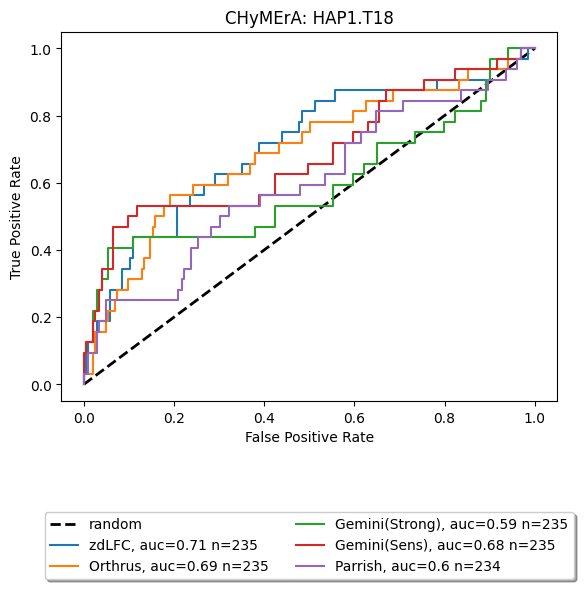

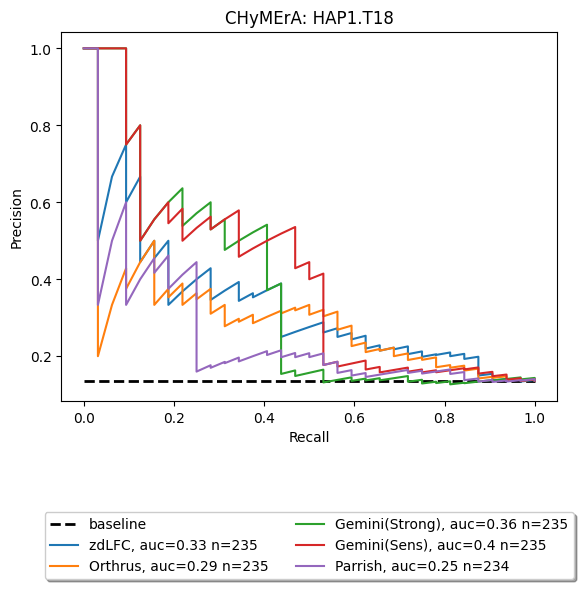

In [9]:
# These figures are not included in the paper. 
Chymera_HAP1_T18 = pd.concat([ # remove T12, its ETP, not needed as per slkb
    zdLFC['HAP1.T18'], 
    orthrus['HAP_T18'], 
    gemini_strong_HAP1['HAP1.T18'],
    gemini_SensL_HAP1['HAP1.T18'],
    
    parrish_score['GI_score_HAP1']
    
], axis = 1, keys= scores)

#Chymera_HAP1_T12
results_Chymera_HAP1_LTP =Cell_Line_Analysis(Chymera_HAP1_T18, 'HAP1.T18', 'CHyMErA', scores, ground_truth_depmap_hit)



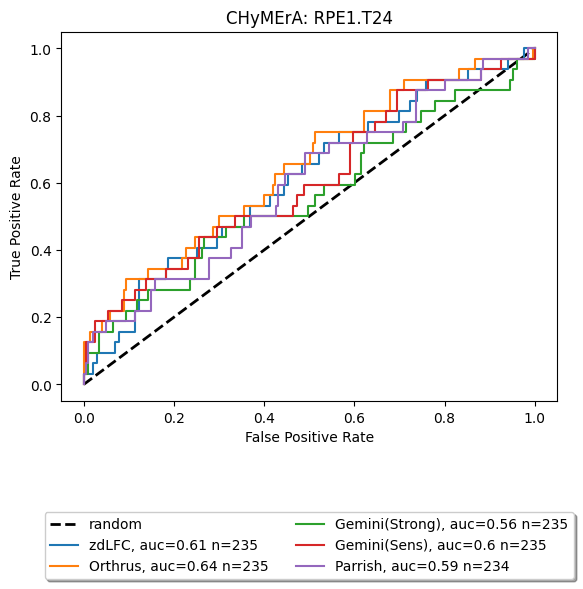

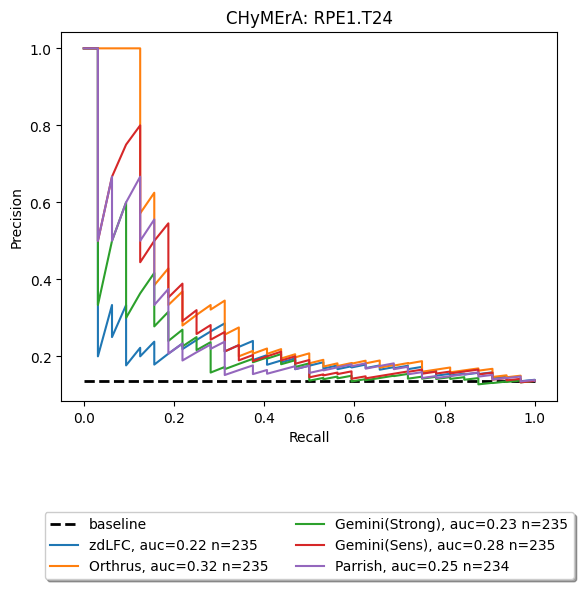

In [10]:

Chymera_RPE1_T24 = pd.concat([zdLFC['RPE1.T24'], orthrus['RPE_T24'],
                             gemini_strong_RPE1['RPE1.T24'],
                             gemini_SensL_RPE1['RPE1.T24'], 
                             
                              parrish_score['GI_score_RPE1']], axis = 1, keys=scores)

results_Chymera_RPE1_LTP = Cell_Line_Analysis(Chymera_RPE1_T24, 'RPE1.T24', 'CHyMErA', scores, ground_truth_depmap_hit)


In [11]:

full_list = [results_Chymera_HAP1_LTP, results_Chymera_RPE1_LTP]

roc, pr = ConvertResultsToDF(full_list )

## Write results to a file
roc.to_csv("Output" + filtered + "/Chymera_ROC_DepMapHits.csv", index=False)
pr.to_csv("Output" + filtered + "/Chymera_PR_DepMapHits.csv", index=False)


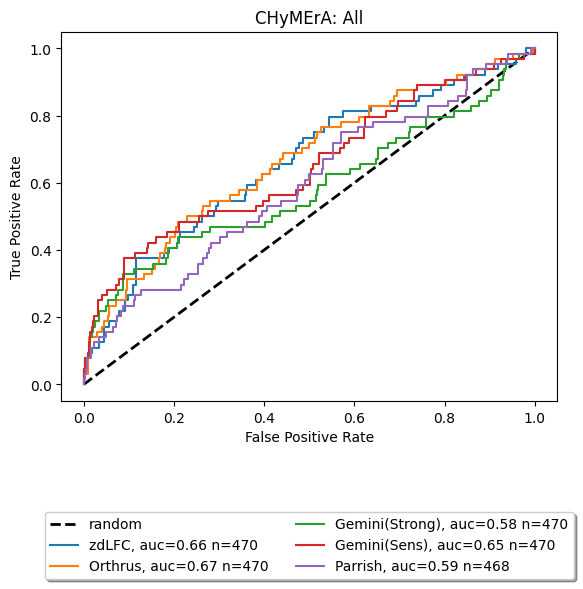

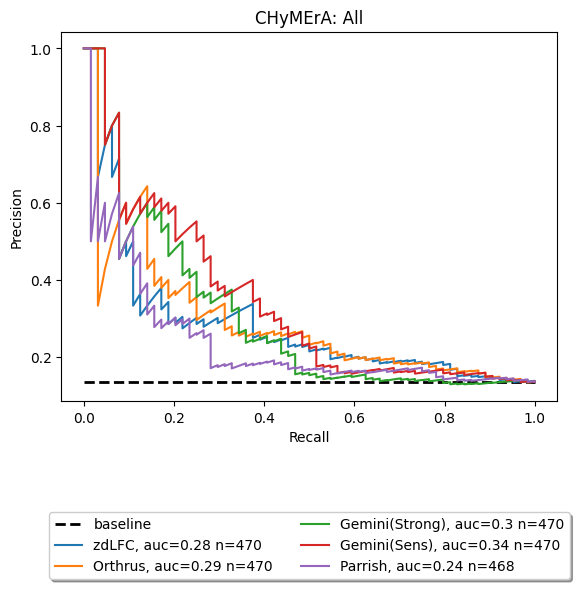

In [12]:

# combine all cell lines and then repeat analysis
chymera_all = pd.concat([Chymera_HAP1_T18, Chymera_RPE1_T24])
results_chymera_all = Cell_Line_Analysis(chymera_all, 'All', 'CHyMErA', scores, ground_truth_depmap_hit)

roc_all, pr_all = ConvertResultsToDF([results_chymera_all] )
## Write results to a file
roc_all.to_csv("Output" + filtered+ "/Chymera_All_ROC_DepMapHits.csv", index=False)
pr_all.to_csv("Output" + filtered + "/Chymera_All_PR_DepMapHits.csv", index=False)


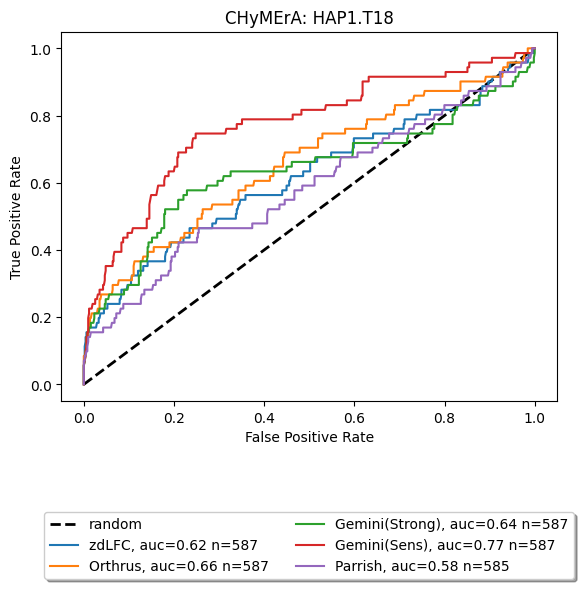

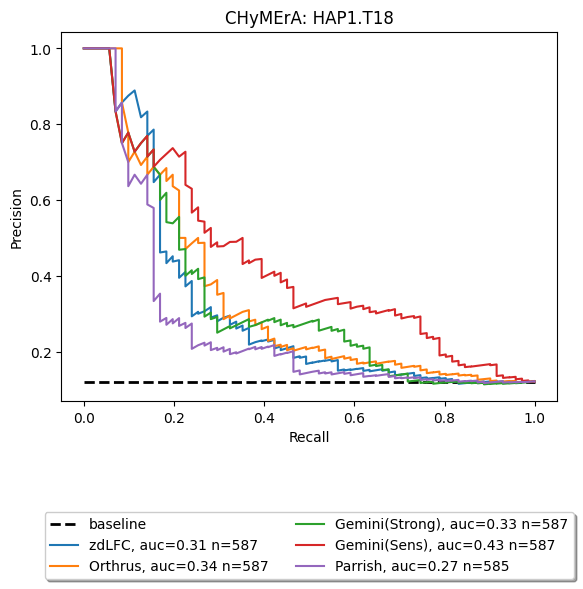

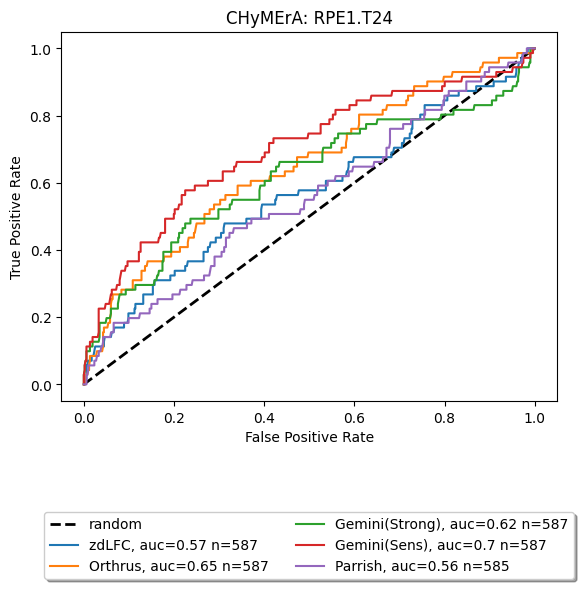

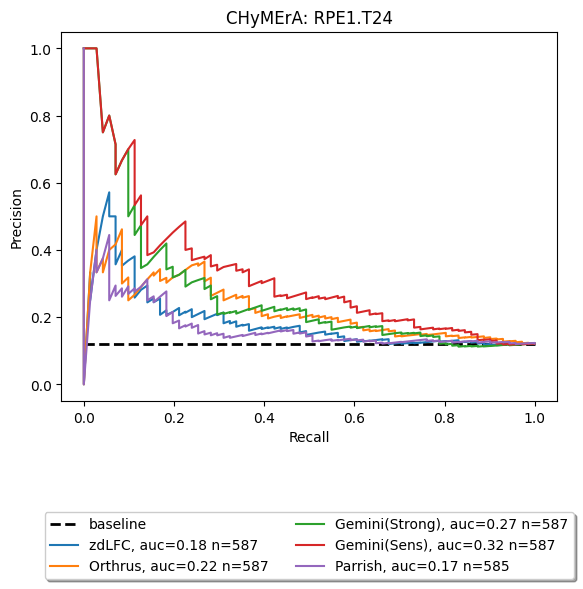

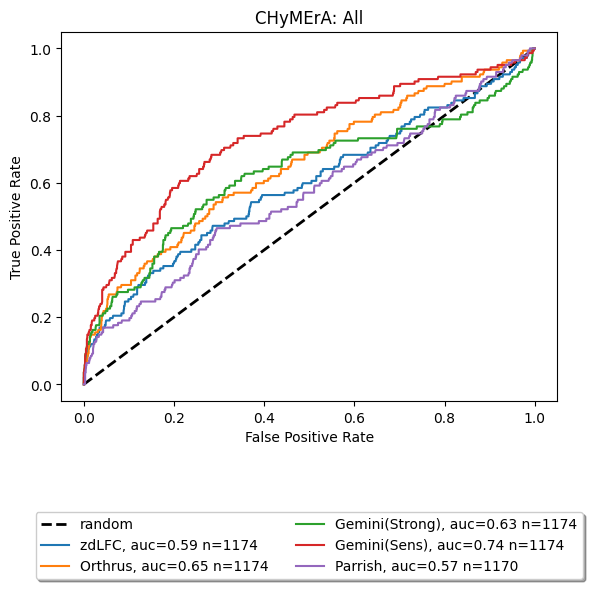

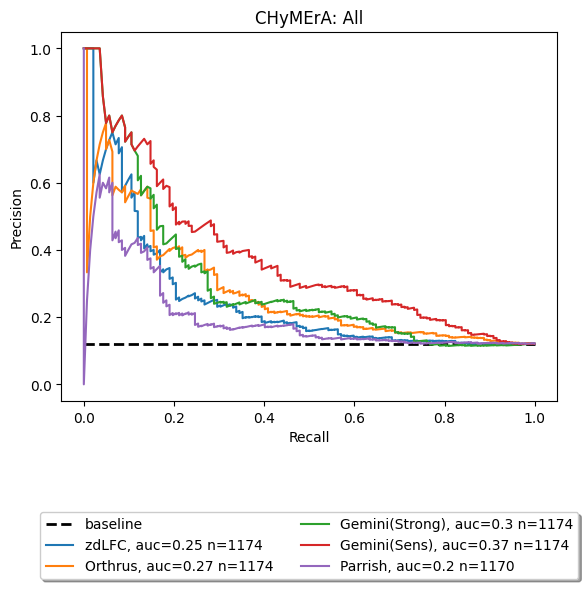

In [13]:
 ##### NOW USE GROUND TRUTH KORLEFE BENCHMARK  #######
chymera_all = pd.concat([Chymera_HAP1_T18, Chymera_RPE1_T24])

results_Chymera_HAP1_LTP_korlefe =Cell_Line_Analysis(Chymera_HAP1_T18, 'HAP1.T18', 'CHyMErA', scores, Koferle)
results_Chymera_RPE1_LTP_korlefe =Cell_Line_Analysis(Chymera_RPE1_T24, 'RPE1.T24', 'CHyMErA', scores, Koferle)

full_list_Koferle = [results_Chymera_HAP1_LTP_korlefe, results_Chymera_RPE1_LTP_korlefe]
roc_Koferle, pr_Koferle = ConvertResultsToDF(full_list_Koferle )


roc_Koferle.to_csv("Output" + filtered+ "/Chymera_ROC_Koferle.csv", index=False)
pr_Koferle.to_csv("Output" + filtered+ "/Chymera_PR_Koferle.csv", index=False)


results_chymera_all_Koferle = Cell_Line_Analysis(chymera_all, 'All', 'CHyMErA', scores, Koferle)

roc_all_Koferle, pr_all_Koferle = ConvertResultsToDF([results_chymera_all_Koferle] )
## Write results to a file

roc_all_Koferle.to_csv("Output" + filtered + "/Chymera_All_ROC_Koferle.csv", index=False)
pr_all_Koferle.to_csv("Output" + filtered + "/Chymera_All_PR_Koferle.csv", index=False)



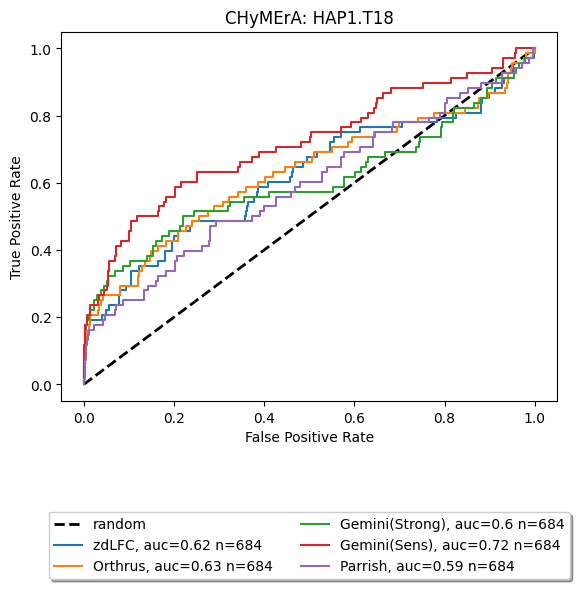

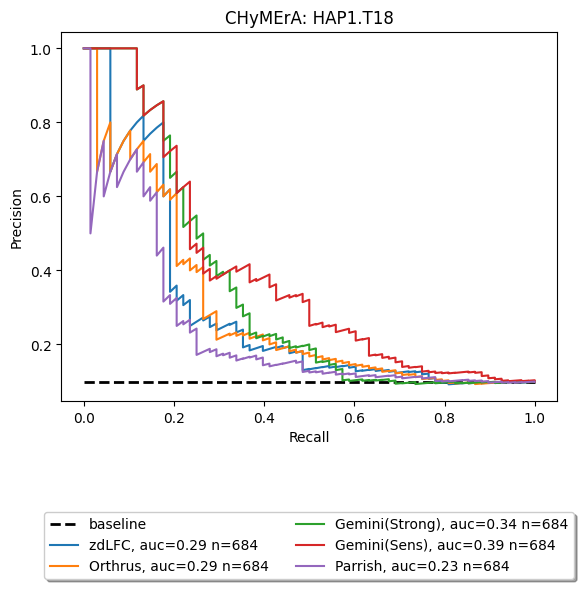

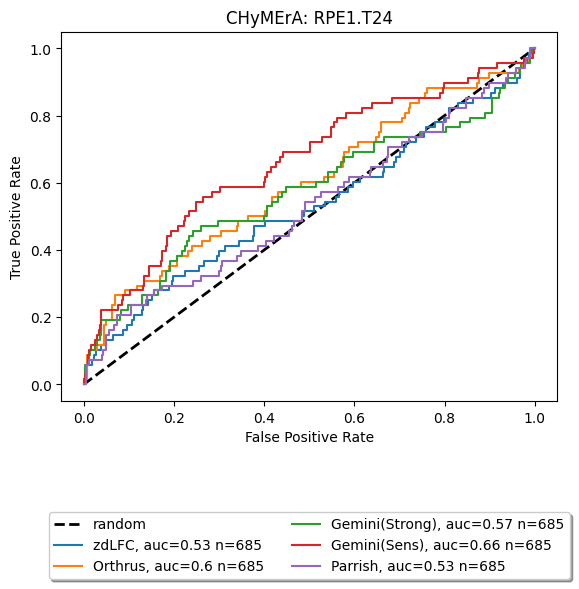

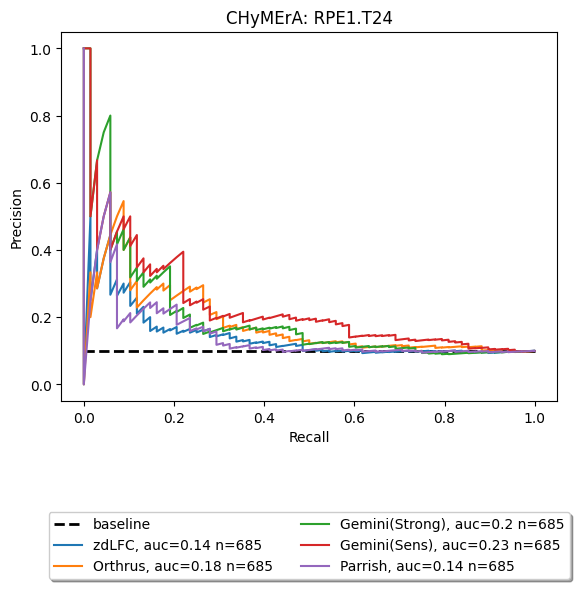

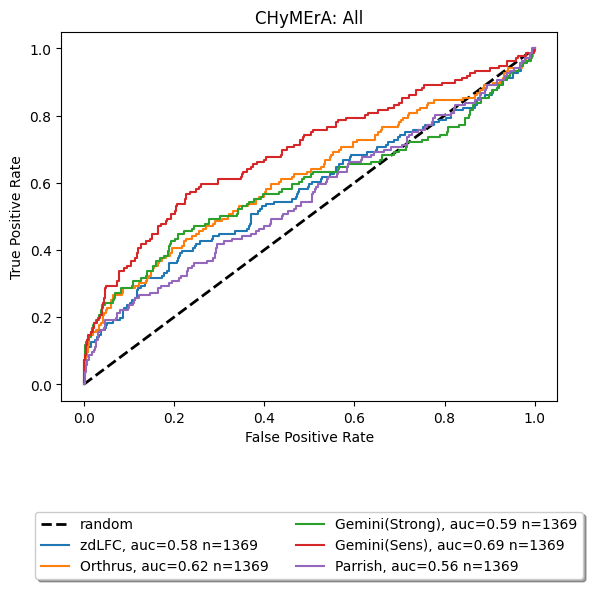

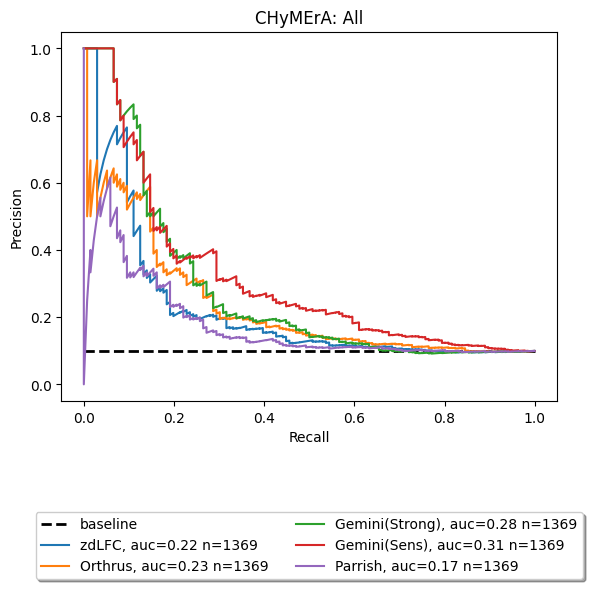

In [14]:
 ##### NOW USE GROUND TRUTH BaCoN  #######
chymera_all = pd.concat([Chymera_HAP1_T18, Chymera_RPE1_T24])

results_Chymera_HAP1_LTP_bacon =Cell_Line_Analysis_bacon(Chymera_HAP1_T18, 'HAP1.T18', 'CHyMErA', scores, bacon)
results_Chymera_RPE1_LTP_bacon =Cell_Line_Analysis_bacon(Chymera_RPE1_T24, 'RPE1.T24', 'CHyMErA', scores, bacon)

full_list_bacon = [results_Chymera_HAP1_LTP_bacon, results_Chymera_RPE1_LTP_bacon]
roc_bacon, pr_bacon = ConvertResultsToDF(full_list_bacon )


roc_bacon.to_csv("Output" + filtered+ "/Chymera_ROC_Bacon.csv", index=False)
pr_bacon.to_csv("Output" + filtered+ "/Chymera_PR_Bacon.csv", index=False)


results_chymera_all_Bacon = Cell_Line_Analysis_bacon(chymera_all, 'All', 'CHyMErA', scores, bacon)

roc_all_Bacon, pr_all_Bacon = ConvertResultsToDF([results_chymera_all_Bacon] )
## Write results to a file

roc_all_Bacon.to_csv("Output" + filtered + "/Chymera_All_ROC_Bacon.csv", index=False)
pr_all_Bacon.to_csv("Output" + filtered + "/Chymera_All_PR_Bacon.csv", index=False)



In [15]:
#chymera_all = pd.concat([Chymera_HAP1_T18, Chymera_RPE1_T24])
output_path = "Output" + filtered + "\Comparison"
# thompson_all = pd.concat([Thompson_A375, Thompson_MEWO, Thompson_RPE])
chymera_all.corr(method = "spearman").to_csv(output_path + "\Chymera_Correlations.csv")

In [16]:
Chymera_HAP1_T18_J = jaccard_similarity(Chymera_HAP1_T18, 0.95)
Chymera_HAP1_T18_J.to_csv(output_path + "\Chymera_HAP1_Jaccard.csv")

Chymera_RPE1_T24_J = jaccard_similarity(Chymera_RPE1_T24, 0.95)
Chymera_RPE1_T24_J.to_csv(output_path + "\Chymera_RPE1_Jaccard.csv")

Chymera_Jaccard = (Chymera_HAP1_T18_J + Chymera_RPE1_T24_J) / 2
Chymera_Jaccard

,zdLFC,Orthrus,Gemini(Strong),Gemini(Sens),Parrish
zdLFC,1.000000,0.509740,0.297619,0.283333,0.481729
Orthrus,0.509740,1.000000,0.392829,0.392829,0.464052
Gemini(Strong),0.297619,0.392829,1.000000,0.799604,0.339286
Gemini(Sens),0.283333,0.392829,0.799604,1.000000,0.339286
Parrish,0.481729,0.464052,0.339286,0.339286,1.000000


In [17]:
Chymera_Jaccard.to_csv(output_path + "\Chymera_Jaccard.csv")

Best AUROC Method: Orthrus
Best AUPR Method: Gemini(Sens)


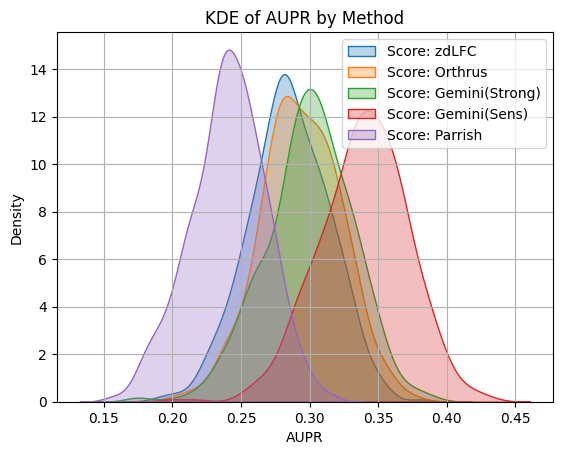

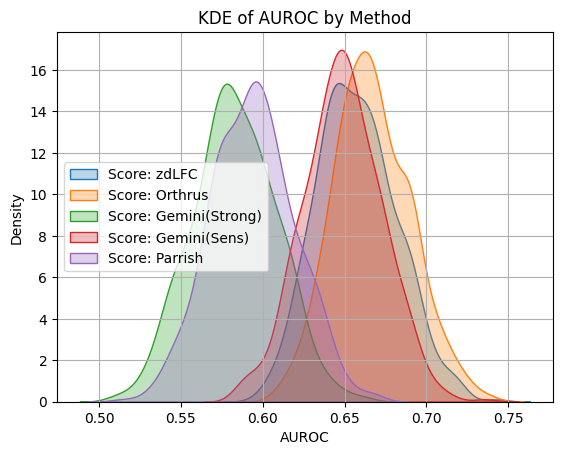

,method,p_value,fdr,bonferroni,significant_bh,signicant_bonferroni
2,Parrish,0.000000e+00,0.000000e+00,0.000000e+00,True,True
1,Gemini(Strong),4.571095e-320,9.142191e-320,1.828438e-319,True,True
3,zdLFC,2.374958e-80,3.166611e-80,9.499833e-80,True,True
0,Gemini(Sens),5.142424e-63,5.142424e-63,2.056970e-62,True,True


,method,p_value,fdr,bonferroni,significant_bh,signicant_bonferroni
0,Gemini(Strong),1.506453e-273,6.025813e-273,6.025813e-273,True,True
2,Parrish,1.493620e-251,2.987240e-251,5.974480e-251,True,True
3,zdLFC,2.898724e-155,3.864965e-155,1.159490e-154,True,True
1,Orthrus,2.430480e-150,2.430480e-150,9.721920e-150,True,True


In [18]:
results, aupr_test, auroc_test = Resampling_analysis(chymera_all, 'All', 'chymera', scores, ground_truth_depmap_hit , n_repeats=500, frac=0.75)
display(auroc_test)
display(aupr_test)


Best AUROC Method: Gemini(Sens)
Best AUPR Method: Gemini(Sens)


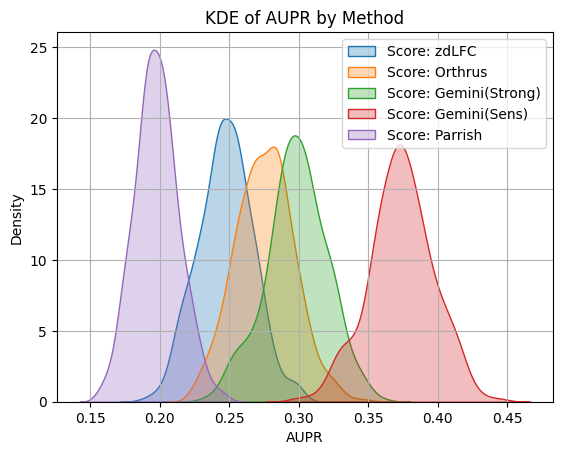

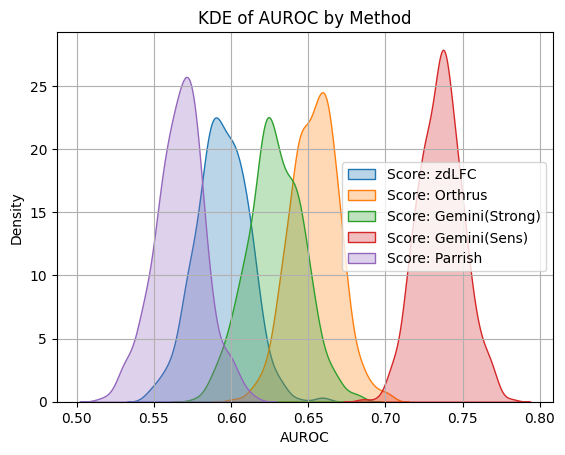

,method,p_value,fdr,bonferroni,significant_bh,signicant_bonferroni
0,Gemini(Strong),0.0,0.0,0.0,True,True
1,Orthrus,0.0,0.0,0.0,True,True
2,Parrish,0.0,0.0,0.0,True,True
3,zdLFC,0.0,0.0,0.0,True,True


,method,p_value,fdr,bonferroni,significant_bh,signicant_bonferroni
0,Gemini(Strong),0.0,0.0,0.0,True,True
1,Orthrus,0.0,0.0,0.0,True,True
2,Parrish,0.0,0.0,0.0,True,True
3,zdLFC,0.0,0.0,0.0,True,True


In [19]:
results, aupr_test, auroc_test = Resampling_analysis(chymera_all, 'All', 'chymera', scores, Koferle , n_repeats=500, frac=0.75)
display(auroc_test)
display(aupr_test)
